<a href="https://colab.research.google.com/github/Chris240401/APIS/blob/main/E02_Tu_CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



# 0) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU CI</font>

Ejemplo, si tu CI es 1234567890, el nombre de este archivo debe cambiarse de "E02_nombre_apellido.ipynb" a "E02_12345678-9.ipynb"


# 1) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2) Corrección de Perspectiva

(5 Puntos)

Para la imagen `clock.png`, corrija la perspectiva de tal forma que el reloj se vea de frente.

La imagen se puede descargar aquí:

`https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png`

A manera de ejemplo se muestra cómo debería quedar la imagen de salida, observe que a la salida el borde interno del reloj es ahora circular


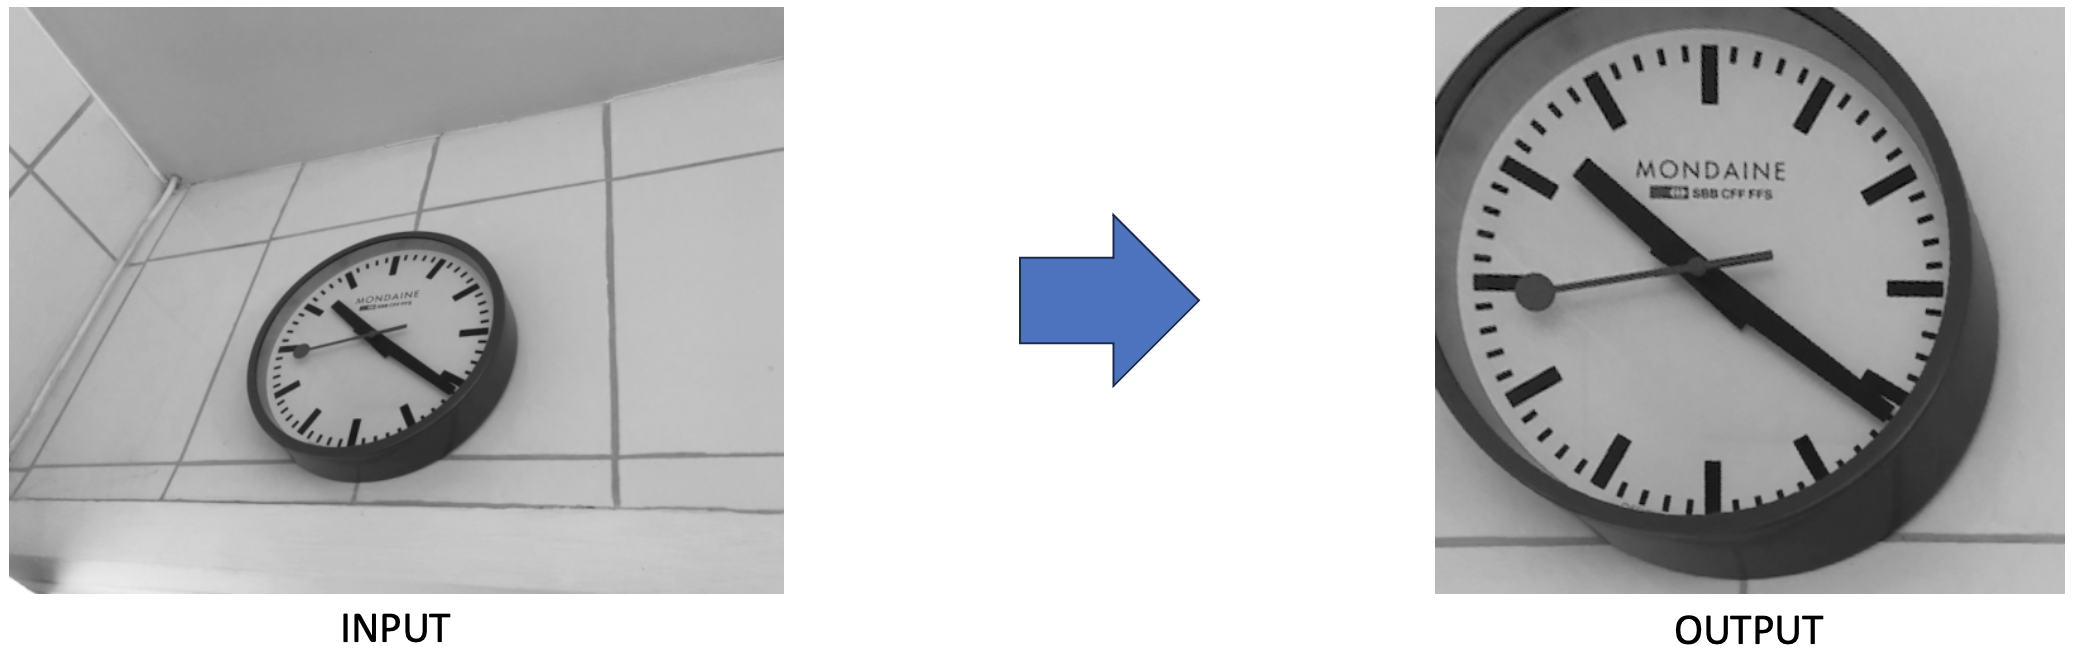

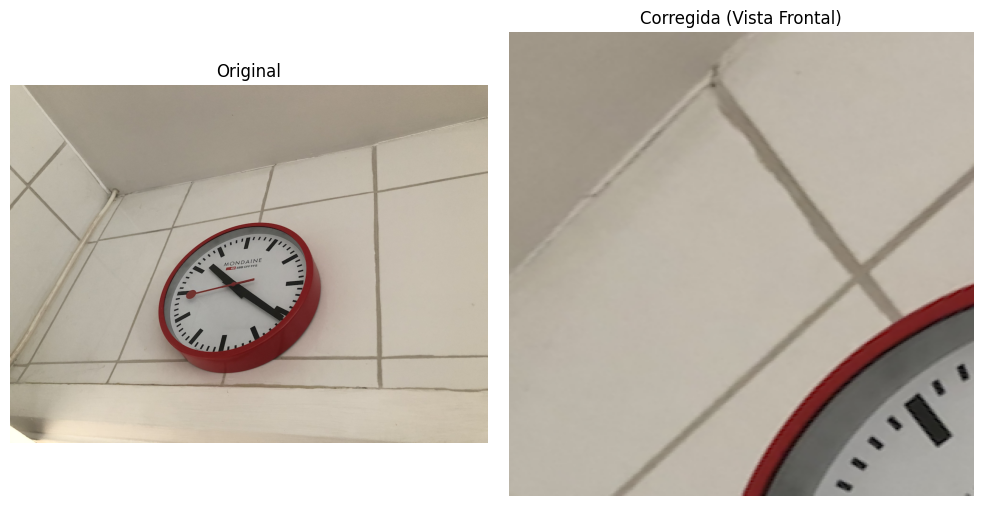

In [10]:
# Cargar la imagen original
image_path = "/content/clock.png"  # Asegúrate de que la imagen esté en el mismo directorio del notebook
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Estimar manualmente las esquinas del reloj (en píxeles)
src_points = np.array([
    [637, 209],  # esquina superior derecha
    [520, 118],  # esquina superior izquierda
    [360, 270],  # esquina inferior izquierda
    [485, 375]   # esquina inferior derecha
], dtype="float32")

# Definir destino como un cuadrado frontal de 300x300 píxeles
dst_size = 300
dst_points = np.array([
    [dst_size, 0],
    [0, 0],
    [0, dst_size],
    [dst_size, dst_size]
], dtype="float32")

# Calcular la transformación de perspectiva
M = cv2.getPerspectiveTransform(src_points, dst_points)
corrected = cv2.warpPerspective(image_rgb, M, (dst_size, dst_size))

# Mostrar la imagen original y la corregida
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_rgb)
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(corrected)
axs[1].set_title("Corregida (Vista Frontal)")
axs[1].axis('off')

plt.tight_layout()
plt.show()

## 3.2) Transformación 3D -> 3D

(4 punto)

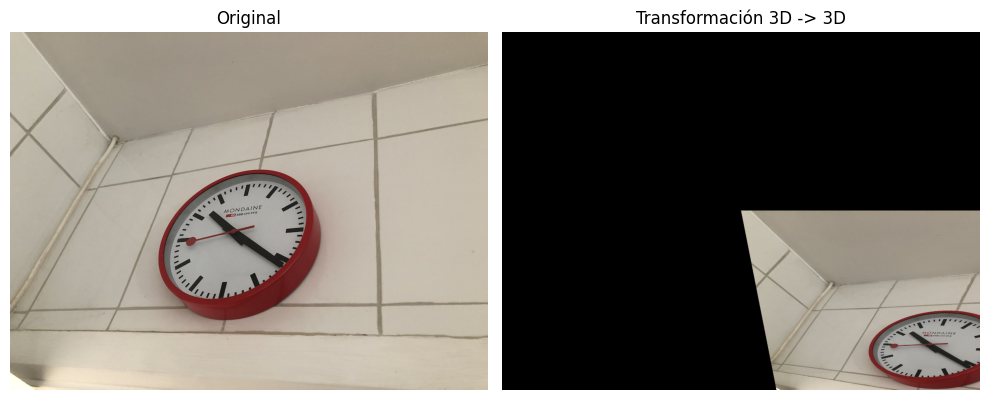

In [12]:
# Cargar imagen
image = cv2.imread("/content/clock.png")
h, w = image.shape[:2]

# Definir matriz intrínseca de cámara simulada
f = 800  # distancia focal simulada
cx, cy = w // 2, h // 2
K = np.array([[f, 0, cx],
              [0, f, cy],
              [0, 0, 1]])

# Definir rotación en 3D (por ejemplo, 30° sobre X, 20° sobre Y)
theta_x = np.deg2rad(30)
theta_y = np.deg2rad(20)

Rx = np.array([
    [1, 0, 0],
    [0, np.cos(theta_x), -np.sin(theta_x)],
    [0, np.sin(theta_x), np.cos(theta_x)]
])

Ry = np.array([
    [np.cos(theta_y), 0, np.sin(theta_y)],
    [0, 1, 0],
    [-np.sin(theta_y), 0, np.cos(theta_y)]
])

# Combinamos rotaciones (primero X, luego Y)
R = Ry @ Rx
Rt = np.hstack((R, np.array([[0], [0], [1000]])))  # pequeña traslación para mantener imagen visible

# Proyección: K * [R | t]
H = K @ Rt[:, [0,1,3]]  # usar solo X, Y, t para obtener matriz de proyección homográfica
H = H / H[2, 2]         # normalizar

# Aplicar la transformación
warped = cv2.warpPerspective(image, H, (w, h))

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title("Transformación 3D -> 3D")
plt.axis("off")

plt.tight_layout()
plt.show()


# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A LA PLATAFORMA DEL ISTER</font>

